In [35]:
import os
import numpy as np
import matplotlib.pyplot as plt
root_dir = "/home/chensiyu/workspace/01_main_dataset/02_reconstruct_dataset/02_chl_8d_scs_npy/chlora"


In [36]:
data_cloud_ratio_list:list = []

from global_land_mask import globe
lon_ = np.linspace(
    start=105,
    stop=125,
    num=480
)
lat_ = np.linspace(
    start=25,
    stop=5,
    num=480
)
lons, lats = np.meshgrid(lon_, lat_)
land_mask = globe.is_land(lats, lons)

In [37]:
def cal_cloud_mask(array_with_cloud, land_mask):
    cloud_ratio = np.sum(
        np.isnan(array_with_cloud[land_mask == 0])) / (np.sum(np.isnan(array_with_cloud[land_mask == 0])) + np.sum(~np.isnan(array_with_cloud[land_mask == 0])))
    return np.around(100 * cloud_ratio,2)

def dir_list_select_combine(base_dir:str, suffix_condition: str='.npy') -> list:
    files_dir = os.listdir(base_dir)
    assert len(files_dir) > 0
        
    suffix_files_list:list = [
        os.path.join(base_dir, file_name) for file_name in files_dir if os.path.splitext(file_name)[1] == suffix_condition]
    return suffix_files_list

dir_list = dir_list_select_combine(root_dir)

In [38]:
for npy_file_dir in dir_list:
    data_cloud_ratio_list.append(cal_cloud_mask(np.load(npy_file_dir),land_mask))

In [42]:
x_tick = np.arange(len(data_cloud_ratio_list)-1)
mean = round(np.mean(data_cloud_ratio_list),3)
mean_tick = np.zeros(shape=x_tick.shape)
mean_tick = mean_tick + mean

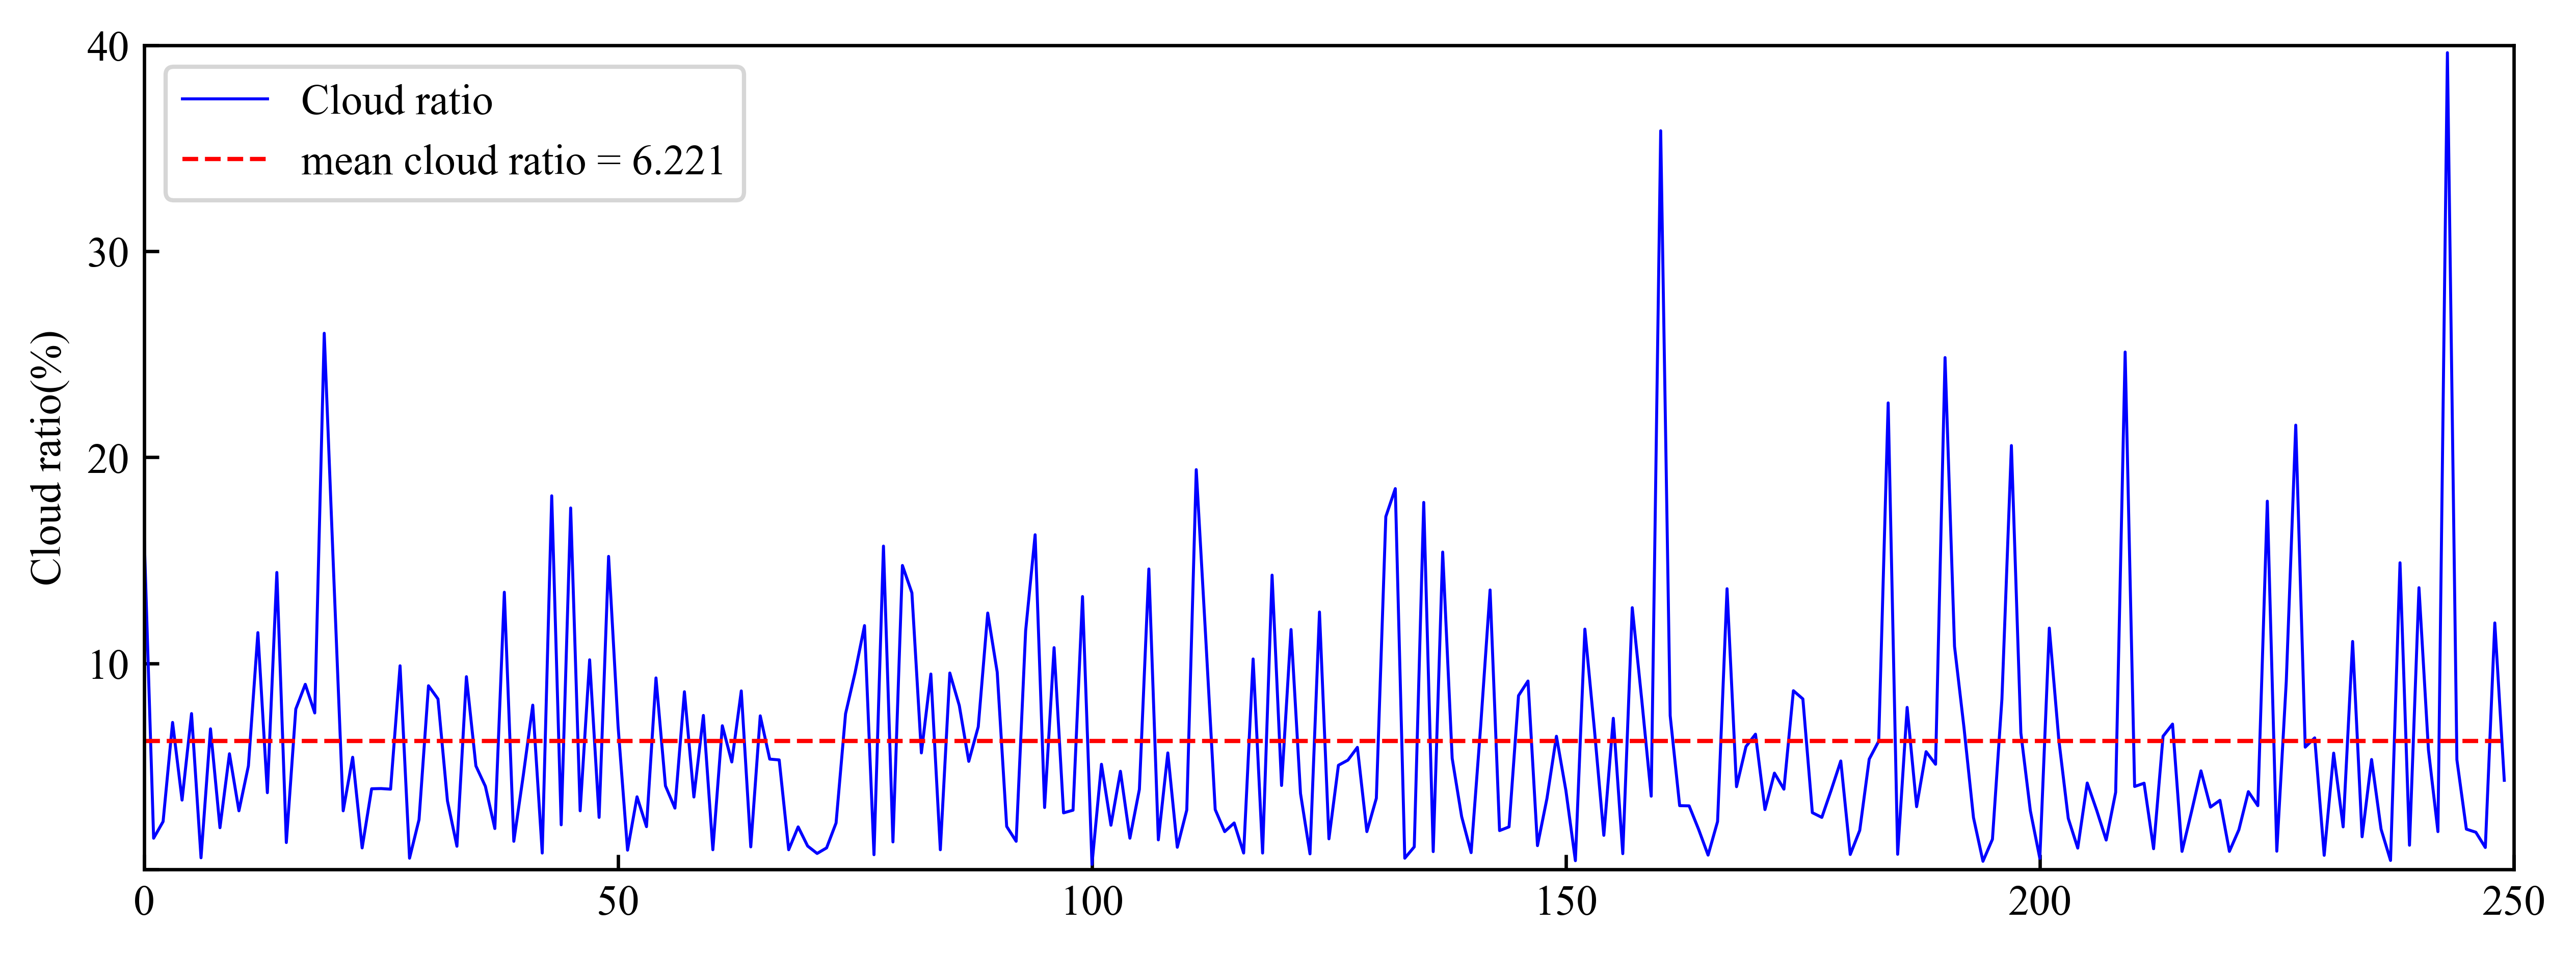

In [34]:
plt.rcParams["font.family"] = "times New Roman"
plt.figure(dpi=600,figsize=(10,3.5))
plt.plot(
    x_tick, data_cloud_ratio_list[0:250],
    linewidth=0.7,color='blue',label='Cloud ratio')
plt.plot(
    x_tick, mean_tick, 
    linewidth=1.,color='red', linestyle='--',label=f'mean cloud ratio = {mean}')
plt.xlim(0,250)
plt.ylim(0,40)
plt.locator_params(axis='x',nbins=6)
plt.locator_params(axis='y',nbins=5)
plt.yticks([0,10,20,30,40,],labels=['',10,20,30,40,])
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.ylabel("Cloud ratio(%)")
plt.legend(loc='best')

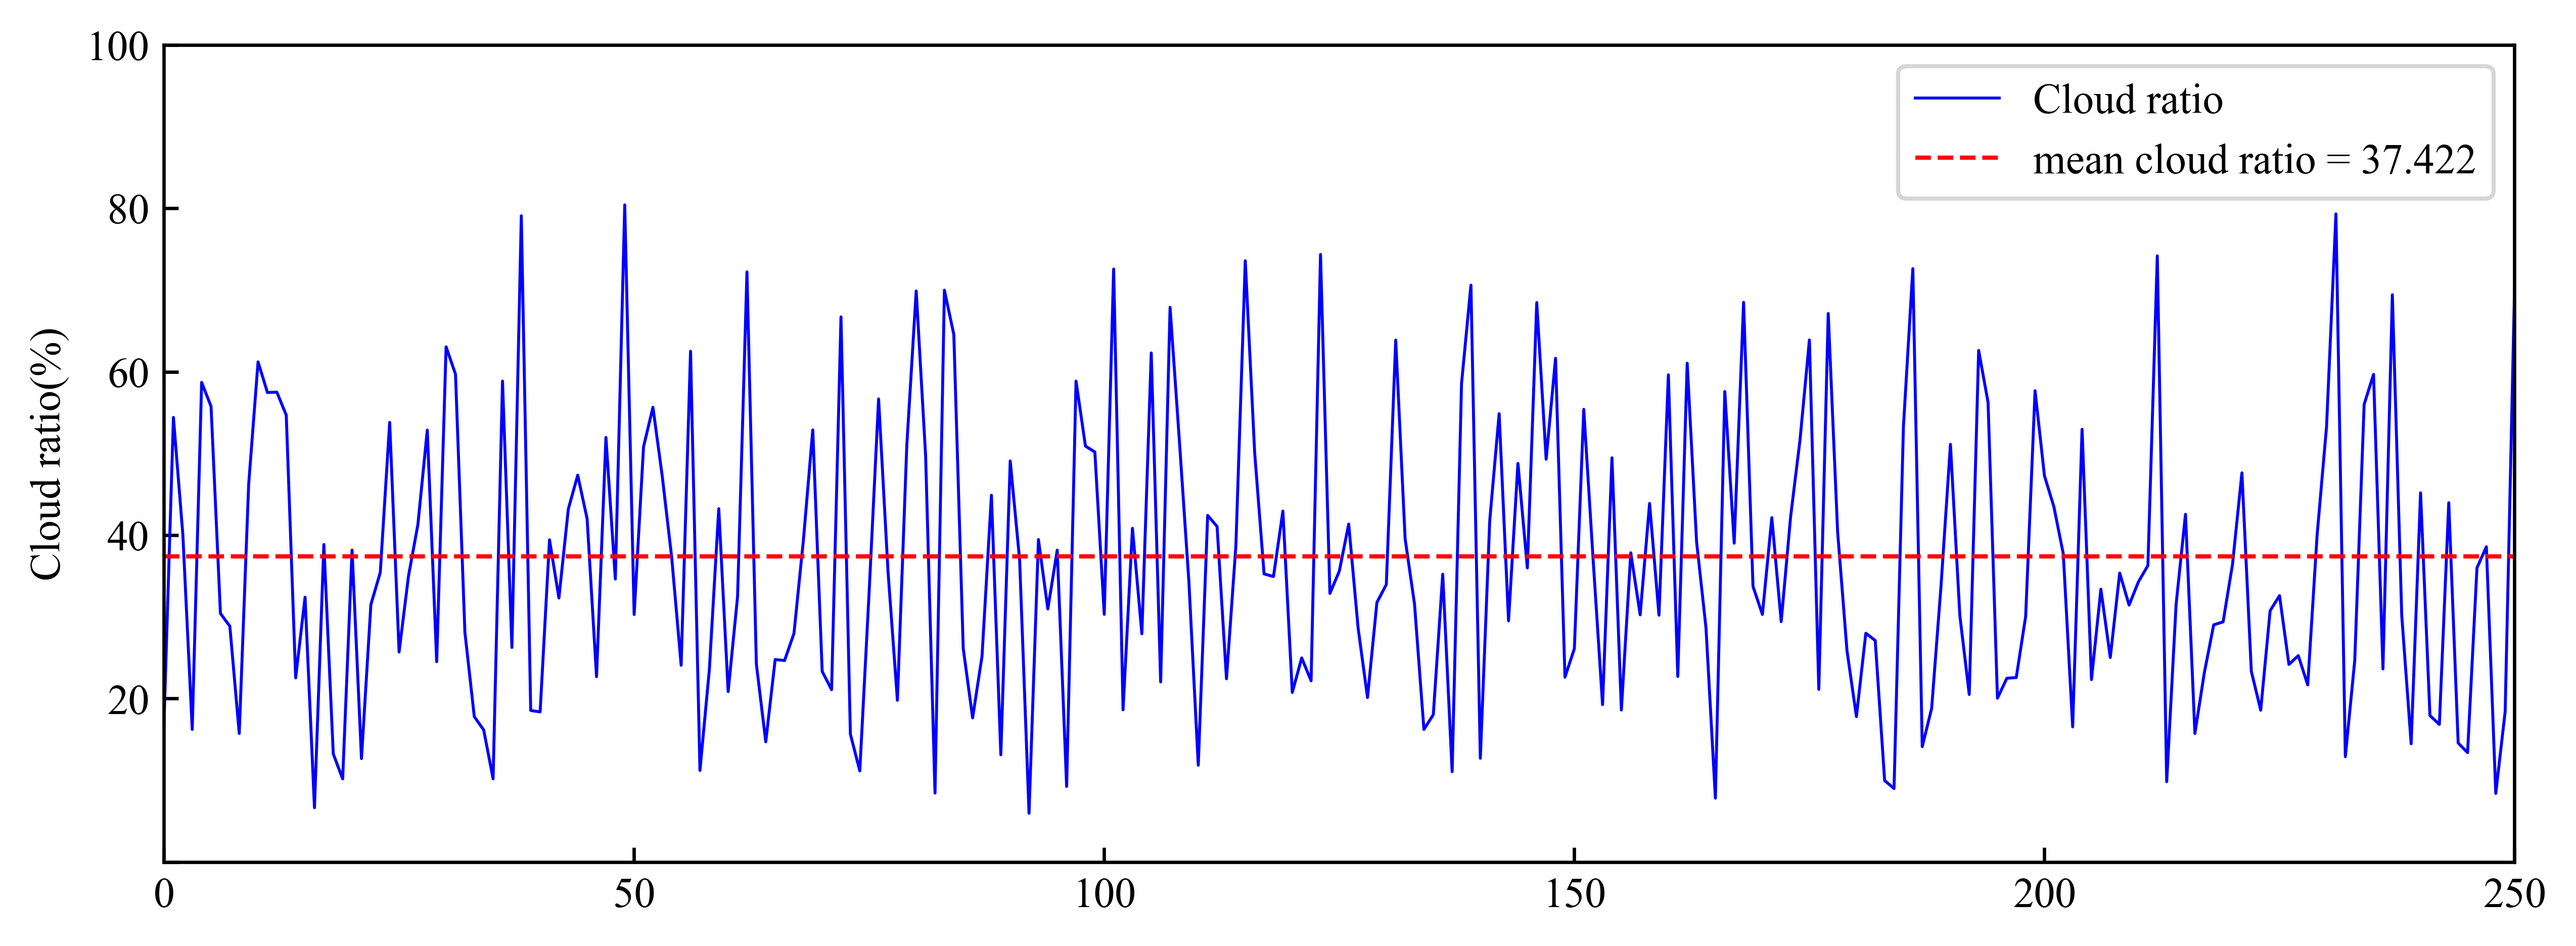

In [44]:
plt.rcParams["font.family"] = "times New Roman"
plt.figure(dpi=600,figsize=(10,3.5))
plt.plot(
    x_tick, data_cloud_ratio_list[0:900],
    linewidth=0.7,color='blue',label='Cloud ratio')
plt.plot(
    x_tick, mean_tick, 
    linewidth=1.,color='red', linestyle='--',label=f'mean cloud ratio = {mean}')
plt.xlim(0,250)
plt.ylim(0,100)
plt.locator_params(axis='x',nbins=6)
plt.locator_params(axis='y',nbins=5)
plt.yticks([0,20,40,60,80,100],labels=['',20,40,60,80,100])
plt.tick_params(axis='x',direction='in')
plt.tick_params(axis='y',direction='in')
plt.ylabel("Cloud ratio(%)")
plt.legend(loc='best')